<a href="https://colab.research.google.com/github/Sockcave/GGWP/blob/main/eng_chat_eda1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
pip install boto3

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from collections import Counter

In [73]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [74]:
#Loading data into colab from AWS
import boto3

BUCKET_NAME = 'ggwp-data' # replace with your bucket name


In [75]:
data = pd.read_csv('eng_chat.csv')
data.head()

,Unnamed: 0,Unnamed: 1,match,time,slot,text,lang
0,b0,8,0,1808.40822,9,100%,en
1,b0,9,1,-131.14018,0,twitch.tv/rage_channel,en
2,b0,10,1,-121.60481,0,https://www.twitch.tv/rage_channel,en
3,b0,18,1,700.72893,0,https://www.twitch.tv/rage_channel,en
4,b0,19,1,702.99503,0,https://www.twitch.tv/rage_channel,en


In [76]:
data.shape

(6921688, 7)

In [77]:
data = data.iloc[:, 2:6]

In [78]:
data.head()

,match,time,slot,text
0,0,1808.40822,9,100%
1,1,-131.14018,0,twitch.tv/rage_channel
2,1,-121.60481,0,https://www.twitch.tv/rage_channel
3,1,700.72893,0,https://www.twitch.tv/rage_channel
4,1,702.99503,0,https://www.twitch.tv/rage_channel


In [79]:
data.shape

(6921688, 4)

In [80]:
print('There are about ' + str(data.shape[0]) + ' English text rows.')

There are about 6921688 English text rows.


##**Exploring the Data at First Glance**

In [81]:
data[data['text'].str.contains('fuck')]

,match,time,slot,text
24,6,241.44110,1,fucking reported axe
71,9,2043.83972,3,fuckING
98,13,722.92344,0,fuckkk youuuuu
160,30,-19.06202,1,fuck off lol
184,32,1369.39897,5,yuou just fuck your ulti as hell
...,...,...,...,...
6921426,999952,1121.59276,5,noob as fuck again
6921447,999958,2155.05888,5,guys i'm just a sky with a fucking cloack
6921538,999977,1375.63080,8,fuck this system honestly
6921592,999980,1055.46878,9,fuck up


In [85]:
#What happenes if an English-speaking player uses words from different languages? Classify as English.
data[data['text'].str.contains('ni hao')]

,match,time,slot,text
311862,44969,1276.22170,1,ni hao ma this dick nigga
2314924,333244,-120.43761,2,ni hao dogfights
2504173,360367,1582.16742,7,hai ni hao whuvqcfhds ghfdwco
2545990,366269,-49.52125,2,ching chong ni hao
3049656,439298,1485.37065,6,ni hao motherfuckers
4464223,645007,-229.17075,2,ge ni hao liu
6468066,934508,1093.99958,7,ืni hao laoshi


## **Match**
Running value_counts() on the match col will tell us how many messages were sent in a partiuclar match.

In [86]:
number_of_messages_each_match = data['match'].value_counts()
number_of_messages_each_match

404637    1066
6625      1044
546390     871
880953     487
113221     463
          ... 
560370       1
572660       1
589052       1
17762        1
0            1
Name: match, Length: 763097, dtype: int64

In [87]:
#Checking that match 404637 actually does have 1066 rows.
data[data['match'] == 404637]

,match,time,slot,text
2811245,404637,272.51392,7,sf said ez lol
2811246,404637,1103.31110,0,Like my dick
2811247,404637,1191.68950,7,noob jug idiot dog ugly nigga
2811248,404637,1191.95610,7,noob jug idiot dog ugly nigga
2811249,404637,1192.22270,7,noob jug idiot dog ugly nigga
...,...,...,...,...
2812306,404637,1993.41980,7,noob jug idiot dog ugly nigga
2812307,404637,1993.68740,7,noob jug idiot dog ugly nigga
2812308,404637,1993.95500,7,noob jug idiot dog ugly nigga
2812309,404637,1994.22260,7,noob jug idiot dog ugly nigga


In [88]:
#No Null Values
data.isna().sum()

match    0
time     0
slot     0
text     0
dtype: int64

##**Time**
Time distribution

Text(0.5, 1.0, 'Distribution of Time')

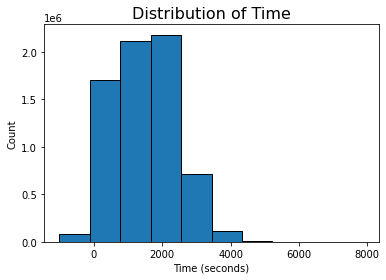

In [148]:
plt.hist(data['time'], ec = 'black')
plt.xlabel('Time (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Time', fontsize = 16)

*The amount of text varying over time suggests further exploration in a potential relationship between text content and time interval in game*

In [90]:
#Looking at the max length, min length, and average length of the games.
print("max:", round(data['time'].max()), "| min:", round(data['time'].min()), "| mean:", round(data['time'].mean()))

max: 7898 | min: -1012 | mean: 1462


*On average, players mostly talk about 1462 seconds/24 minutes into the game.*



*The highly negative time chats range in discussion topics.*

In [96]:
#The negative time chats are likely pre-game discussions.
# The first 10
data[data['time'] < 0].sort_values('time').head(10)

,match,time,slot,text
2337694,336424,-1011.525424,6,xenophobes
1573940,226839,-1008.437627,9,rofl
2337695,336424,-1005.792180,6,whoops
1573941,226839,-1002.704380,9,seriously valve
2337696,336424,-993.925690,9,and make it double
1573942,226839,-992.037877,8,revenge has come
2337697,336424,-982.925860,6,bag of burgers
4571912,660552,-972.175637,3,you poor bitch
3617886,521976,-971.340756,7,ghbdtn
4571913,660552,-967.242380,3,ICX or death


In [97]:
# The last 10 or least negative time stamps
data[data['time'] < 0].sort_values('time').tail(10)

,match,time,slot,text
1068478,154265,-0.03332,3,so yeah
1068477,154265,-0.03332,1,he cant find the button to reconnect
1068476,154265,-0.03332,1,has no eyes
3788236,546824,-0.03332,3,anyway
6920870,999883,-0.03332,5,thank you very much
3197044,460507,-0.03332,4,everyone
2922008,420740,-0.03332,4,Report Innervision please.
6225520,899040,-0.03330,1,just asking
3591013,518329,-0.03330,4,but ur cock is not good
3105644,447349,-0.03330,1,wut


In [123]:
# The top 10 most common words in between -3 and 0 seconds before the match starts
Counter(data[(data['time'] >= -3) & (data['time'] <= 0)]['text']).most_common(10)

[('lol', 281),
 ('ok', 111),
 ('XD', 108),
 ('(', 71),
 ('wtf', 66),
 ('LOL', 54),
 ('rofl', 51),
 ('yes', 50),
 ('wp', 49),
 ('wait', 42)]

In [126]:
# The top 10 most common words overall before the match starts. 
Counter(data[data['time'] < 0]['text']).most_common(10)

[('lol', 11030),
 ('ok', 4797),
 ('XD', 3903),
 ('wait', 2739),
 ('wtf', 2331),
 ('rofl', 2286),
 ('GL HF', 2132),
 ('pls', 2080),
 ('yes', 2013),
 ('go', 1989)]

The word 'wait' appears a lot, which makes sense. Players could be telling other players to wait before the game starts during intermission.

***The rows where the match has not begun yet.***

In [133]:
pre_match = data[data['time'] < 0]
pre_match

,match,time,slot,text
1,1,-131.140180,0,twitch.tv/rage_channel
2,1,-121.604810,0,https://www.twitch.tv/rage_channel
43,8,-101.669062,5,nice random ... lol
102,17,-55.953000,1,remember me last game
122,20,-59.688150,3,:*
...,...,...,...,...
6921612,999985,-33.158570,3,U MID??
6921613,999985,-25.760380,8,Lychan is a wood hero
6921614,999985,-17.629030,3,DAZZLE MID???
6921626,999989,-6.231820,3,all top


In [138]:
#Looking into the instances where the word 'wait' appears in pre-match chats
pre_match[pre_match['text'].str.contains('wait')]

,match,time,slot,text
1833,254,-86.54552,8,can u just wait ?
1873,263,-36.69104,3,wait i pee
2701,389,-66.91698,0,wait for ward
5364,851,-70.48278,6,so lets wait motherfucker
5424,864,-87.11206,3,wait plz
...,...,...,...,...
6919872,999763,-23.69422,4,ppls wait
6920652,999859,-73.14881,1,we cant wait all day
6921120,999932,-83.44629,6,just wait
6921126,999932,-77.34777,7,cant wait?



## **Slot**
Radiant and Dire correspond to the two different teams within one match. The team that spawns at the bottom left half of the map(0-4) is the Radiant team, whereas the team that spawns at the top right half(5-9) of the map is the Dire team.

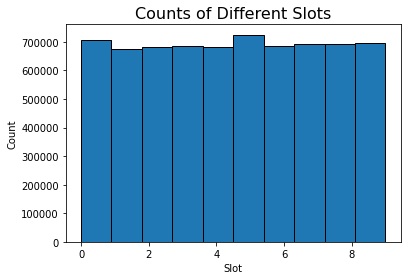

In [147]:
plt.hist(data['slot'], ec = 'black') # ec = edgecolor
plt.xlabel('Slot')
plt.ylabel('Count')
plt.title('Counts of Different Slots', fontsize = 16);

In [149]:
# Slot number 0-4: Radiant
print("Number of Radiant messages:", sum(data[data['slot'] < 5]['slot'].value_counts()))
data[data['slot'] < 5]['slot'].value_counts()

Number of Radiant messages: 3428722


0    708305
3    683836
2    680441
4    680344
1    675796
Name: slot, dtype: int64

In [150]:
# Slot number 5-9: Dire
print("Number of Dire messages:", sum(data[data['slot'] >= 5]['slot'].value_counts()))
data[data['slot'] >= 5]['slot'].value_counts()

Number of Dire messages: 3492966


5    725076
9    695323
8    693627
7    693026
6    685914
Name: slot, dtype: int64

**There is virtually no difference in the amount of messages the two teams send, although Radiant teams tend to have a higher winrate** (https://www.reddit.com/r/DotA2/comments/aww7ob/radiant_has_an_unacceptable_win_rate_advantage_in/).



In [156]:
data.groupby(['match', 'slot']).size().sort_values(ascending = False).head()
#The most amount of messages sent by one person in one match is 1056.

match   slot
404637  7       1056
546390  6        854
6625    5        636
        1        402
503160  3        332
dtype: int64

In [157]:
print("The average amount of messages one player sends in one match is {}."
      .format(round(data.groupby(['match', 'slot']).size().sort_values(ascending=False).mean())))

The average amount of messages one player sends in one match is 3.


##**Text**

In [159]:
#Most common chat messages
data['text'].str.lower().value_counts().head()

lol      310196
xd       121587
gg wp    117246
ggwp      96570
wp        82854
Name: text, dtype: int64

In [166]:
#Most common words. Convert to lowercase so 'LOL' is equal to 'lol'.
lcw = Counter(data['text'].str.lower())

In [167]:
#Top 15 most common words
lcw.most_common(15)

[('lol', 310196),
 ('xd', 121587),
 ('gg wp', 117246),
 ('ggwp', 96570),
 ('wp', 82854),
 ('end', 65353),
 ('wtf', 56980),
 ('ok', 38461),
 ('rofl', 36110),
 ('ff', 27071),
 ('pls', 25721),
 ('(', 24893),
 ('lmao', 24095),
 ('???', 21910),
 ('nice', 20802)]